<img src="Archivos/miad4.png" width=900x>

 # TAREA 1

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado en un archivo ipynb, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



## Ejercicio 1
(40%) La base de datos contenida en resultadosicfes.csv tiene información de los 
resultados obtenidos en 2019, estos resultados muestran todos los departamentos de 
Colombia, por favor tomar como muestra los resultados de los siguientes 5 departamentos; La 
Guajira, Valle, Atlántico, Bogotá (la cual en las estadísticas se tiene como departamento) y 
Huila. El objetivo es realizar un análisis exploratorio de los datos.


a. (20%) Identifique las variables continuas y para CADA UNA de éstas:
- Determine cuántos valores perdidos tiene cada una.
- Calcule la media, desviación estándar, máximo y mínimo.
- Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos. En lo que sigue trabaje con estas variables corregidas.<br> 
- Calcule nuevamente la media, desviación estándar, máximo, mínimo. Compare los resultados con los hallados los 2 literales anteriores y comente. 

In [1]:
#Importando paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando el dataframe
data = '/Users/santiagoromero/Documents/Maestria/Modelos Analisis Estadisticos/Tareas/Tarea 1 3/Archivos/resultadosicfes.csv'
data_frame = pd.read_csv(data, sep=';')
data_frame.head()

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,M,MAGDALENA,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,47,48,37,30,54.0,208,25.0
1,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,54,59,63.0,299,83.0
2,M,BOLIVAR,Estrato 1,OFICIAL,URBANO,MAÃ‘ANA,66,57,41,74,64.0,299,84.0
3,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,62,54,61,73,53.0,309,88.0
4,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,63,57,55,57,52.0,288,78.0


In [3]:
#Filtrando por departamentos
departamentos = ['LA GUAJIRA','VALLE','ATLANTICO','BOGOTÃ\x81','HUILA']
df_departamentos = data_frame[data_frame['ESTU_DEPTO_RESIDE'].isin(departamentos)]

#Obteniendo las variables continuas
variables_continuas = []
data_types = data_frame.dtypes
for columna, dtype in data_types.items():
    if dtype != 'object':
        variables_continuas.append(columna)

#Creando un diccionario que almacena los valores perdidos
valores_perdidos = {}
for variable in variables_continuas:
    valores_perdidos[variable] = None

#Agregando los valores perdidos a cada variable
for i, variable in enumerate(valores_perdidos):
    valor_perdido = df_departamentos[variable].isna()
    perdidos = valor_perdido.sum()
    valores_perdidos[variable] = perdidos

df_valores_perdidos = pd.DataFrame([valores_perdidos]).transpose()
df_valores_perdidos.index.name = "Variable"
print('Cantidad de datos perdidos para cada variable categorica')
df_valores_perdidos

Cantidad de datos perdidos para cada variable categorica


,0
Variable,
PUNT_LECTURA_CRITICA,0
PUNT_MATEMATICAS,0
PUNT_C_NATURALES,0
PUNT_SOCIALES_CIUDADANAS,0
PUNT_INGLES,1
PUNT_GLOBAL,0
PERCENTIL_GLOBAL,1


In [4]:
#Descriptivos de cada variable continua
#Creando un diccionario que almacena los estadisticos de cada variable
descriptivos = {}
for variable in variables_continuas:
    descriptivos[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_departamentos[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos[variable] = datos
    
df_desciptivos = pd.DataFrame(descriptivos).transpose()
df_desciptivos

,mean,std,max,min
PUNT_LECTURA_CRITICA,53.380226,10.416497,100.0,0.0
PUNT_MATEMATICAS,51.817262,11.876710,100.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0
PUNT_INGLES,50.693926,12.870041,100.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0


In [18]:
#Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos

#Puntajes
puntaje_matematicas = 55
puntaje_lectura = 60
puntaje_ingles = 70

#Creando filtro y generando nuevo dataframe
filtro_matematicas = df_departamentos['PUNT_MATEMATICAS'] < puntaje_matematicas
filtro_lectura = df_departamentos['PUNT_LECTURA_CRITICA'] < puntaje_lectura
filtro_ingles = df_departamentos['PUNT_INGLES'] < puntaje_ingles

df_puntajes = df_departamentos[filtro_matematicas & filtro_lectura & filtro_ingles]
df_puntajes.head()

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
5,M,ATLANTICO,-,NO OFICIAL,URBANO,NOCHE,49,29,41,41,35.0,198,19.0
17,M,HUILA,Estrato 2,NO OFICIAL,URBANO,COMPLETA,48,54,58,50,55.0,263,64.0
21,M,BOGOTÃ,Estrato 2,OFICIAL,URBANO,MAÃ‘ANA,57,51,45,38,56.0,242,49.0
23,M,ATLANTICO,-,OFICIAL,URBANO,UNICA,34,39,38,28,24.0,170,6.0
27,M,BOGOTÃ,Estrato 2,NO OFICIAL,URBANO,COMPLETA,53,48,43,46,46.0,237,45.0


In [28]:
#Creando un diccionario que almacena los valores perdidos
valores_perdidos_puntajes = {}
for variable in variables_continuas:
    valores_perdidos_puntajes[variable] = None

#Agregando los valores perdidos a cada variable
for i, variable in enumerate(valores_perdidos_puntajes):
    valor_perdido = df_puntajes[variable].isna()
    perdidos = valor_perdido.sum()
    valores_perdidos[variable] = perdidos
    
df_perdidos_puntajes = pd.DataFrame([valores_perdidos_puntajes]).transpose()
df_perdidos_puntajes

,0
PUNT_LECTURA_CRITICA,None
PUNT_MATEMATICAS,None
PUNT_C_NATURALES,None
PUNT_SOCIALES_CIUDADANAS,None
PUNT_INGLES,None
PUNT_GLOBAL,None
PERCENTIL_GLOBAL,None


In [29]:
#Descriptivos de cada variable continua
#Creando un diccionario que almacena los estadisticos de cada variable
descriptivos_puntajes = {}
for variable in variables_continuas:
    descriptivos_puntajes[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_puntajes[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos_puntajes[variable] = datos
    
df_desciptivos_puntajes = pd.DataFrame(descriptivos_puntajes).transpose()
df_desciptivos_puntajes

,mean,std,max,min
PUNT_LECTURA_CRITICA,46.536548,7.559186,59.0,0.0
PUNT_MATEMATICAS,43.160360,7.579393,54.0,0.0
PUNT_C_NATURALES,42.640475,7.452929,71.0,0.0
PUNT_SOCIALES_CIUDADANAS,39.935167,8.413279,74.0,0.0
PUNT_INGLES,43.269617,9.182441,69.0,0.0
PUNT_GLOBAL,215.418975,31.258239,305.0,0.0
PERCENTIL_GLOBAL,32.152879,18.883260,86.0,1.0


In [31]:
# Compare los resultados con los hallados los 2 literales anteriores y comente. 
columnas_df_descriptivos = ['Media 1', 'Std 1', 'Max 1', 'Min 1', 'Media 2', 'Std 2', 'Max 2', 'Min 2']
data_frame_descriptivos = pd.concat([df_desciptivos, df_desciptivos_puntajes], axis=1)
data_frame_descriptivos.columns = columnas_df_descriptivos
data_frame_descriptivos

,Media 1,Std 1,Max 1,Min 1,Media 2,Std 2,Max 2,Min 2
PUNT_LECTURA_CRITICA,53.380226,10.416497,100.0,0.0,46.536548,7.559186,59.0,0.0
PUNT_MATEMATICAS,51.817262,11.876710,100.0,0.0,43.160360,7.579393,54.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0,42.640475,7.452929,71.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0,39.935167,8.413279,74.0,0.0
PUNT_INGLES,50.693926,12.870041,100.0,0.0,43.269617,9.182441,69.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0,215.418975,31.258239,305.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0,32.152879,18.883260,86.0,1.0


In [50]:
df_medias = data_frame_descriptivos[['Media 1', 'Media 2']]


In [ ]:
#TODO: realizar pruebas pareadas de media con T student 

b. (5%) Compare en una tabla los puntajes de matemáticas, lectura y ciencias naturales, e ilustre gráficamente con gráficas de caja para cada una de las materias. Comente.

In [35]:
# Implementa tu respuesta en esta celda
tabla_dinamica = pd.pivot_table(df_puntajes, values=['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'], index='ESTU_DEPTO_RESIDE', aggfunc='mean')
tabla_dinamica    

,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
ESTU_DEPTO_RESIDE,,,
ATLANTICO,41.558777,45.431422,42.173478
BOGOTÃ,44.199854,48.069953,44.746252
HUILA,42.899467,46.083756,43.350241
LA GUAJIRA,39.555802,43.146933,40.203548
VALLE,41.987495,46.263250,42.373118


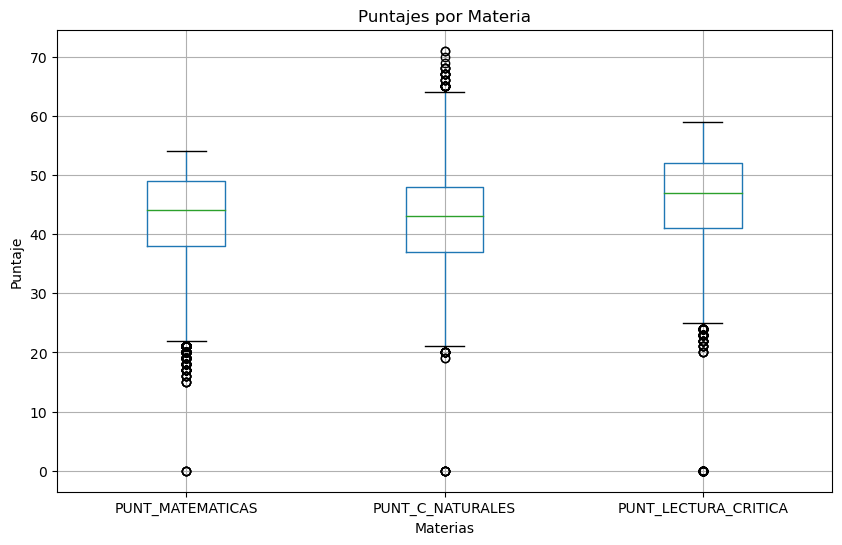

In [37]:
plt.figure(figsize=(10, 6))
df_puntajes.boxplot(column=['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'])
plt.title('Puntajes por Materia')
plt.ylabel('Puntaje')
plt.xlabel('Materias')
plt.show()

c. (5%) Identifique el departamento que tiene los puntajes globales más altos. Identifique el que tiene los mejores puntajes en matemáticas.

In [6]:
# Implementa tu respuesta en esta celda
comparativo_puntahes = df_puntajes[['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA']]
medias_comparativo = comparativo.mean()
print(medias_comparativo)
plt.figure(figsize=(10, 6)) 
medias_comparativo.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Medias de los puntajes')
plt.xlabel('Materias')
plt.ylabel('Media')
plt.xticks(rotation=0)  # Opcional: ajustar la orientación de las etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Opcional: agregar una cuadrícula en el eje y
plt.show()

d. (5%) Muestre en una tabla el número de estudiantes que pertenece a colegios oficiales y no oficiales. Ilustre mediante una gráfica. ¿Cree Ud. que los resultados del puntaje global se ven influenciado por el tipo de colegio?

In [7]:
# Implementa tu respuesta en esta celda



e. (5%) ¿Cree usted que hay alguna relación entre el puntaje global y el estrato del 
estudiante? 

In [8]:
# No modifiques esta celda



## Ejercicio 2

(30%) Teniendo en cuenta los resultados obtenidos por los estudiantes en sus pruebas ICFES una academia dedicada a cursos pre-icfes decidió ofertar una variedad de cursos con el fin de lograr que los estudiantes obtengan puntajes mayores a 400 puntos. La academia optó por desarrollar 4 cursos distintos, estos están pensados variando la intensidad de horas de la siguiente manera; intensivo (2 horas díarias), semi-intensivo (4 horas semanales), semanal (5 horas en un solo día) y super intensivo (3 horas diarias).En la base de datos cursos.cvs, encontrara los resultados obtenidos por los estudiantes de acuerdo con el curso tomado. Con base en la información, conteste las siguientes preguntas: <br>

a. (10%) Realice estadísticas descriptivas (promedio, frecuencia, desviación, entre otros) que permitan observar diferencias de los puntajes obtenidos por los estudiantes según el curso tomado y concluya

In [9]:
# Implementa tu respuesta en esta celda



b. (10%) Un estudiante que se encuentra indeciso por el curso a tomar considera que el 
curso intensivo y el curso super intensivo no tienen ninguna diferencia. ¿Está de acuerdo 
con esta afirmación?

In [10]:
# Implementa tu respuesta en esta celda



c. (10%) Uno de los profesores de la academia desea conocer los puntajes promedio de los estudiantes con el fin de establecer estrategias para que algún estudiante tenga un puntaje mayor a 483 que es el mejor de la academia, ¿cree usted que el profesor puede ayudar a sus estudiantes sugiriéndoles que tomen el curso semanal? ¿Qué curso cree usted que debe sugerir el profesor a sus estudiantes teniendo en cuenta los resultados que se han obtenido? <br>

In [11]:
# Implementa tu respuesta en esta celda



## Ejercicio 3

(30%) Battlife se dedica a la producción de baterías, se sabe la vida útil promedio de sus baterías siguen una distribución normal con una media de 800 horas y una varianza 𝜎2. Un grupo de ingenieros quieren verificar que esta afirmación sea veraz, por lo tanto deciden tomar una muestra aleatoria de 30 baterías con las cuales obtienen que la vida útil promedio es de 790 horas, con una desviación estándar muestral de 50 horas.

a. (10%) ¿Cuál es la probabilidad de que la vida útil promedio real de las baterías sea 
menor a 780 horas?

In [12]:
# Implementa tu respuesta en esta celda



b. (10%) Un comprador está interesado en adquirir un lote de baterías, sin embargo, solicitó que, en una muestra de 40 baterías, la variabilidad de las vidas útiles no debe exceder 5 horas. Calcule la probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere este valor.

In [13]:
# Implementa tu respuesta en esta celda



c. (10%) El área de desarrollo esta haciendo un estudio de mercado dado que desean que las baterías producidas sean las que tengan la mejor vida útil del mercado. Por lo cual, se han obtenido los resultados de una empresa competidora “BattteriesInc”. De “BattteriesInc”. se conoce que la vida útil promedio de las baterías es de 885 horas con una desviación estándar de 30 horas. Se tomó una muestra aleatoria de 20 baterías de Battlife y 15 baterías de BattteriesInc. Asumiendo que las variables aleatorias son independientes, ¿cuál es la probabilidad de que la varianza muestral de la vida útil producida por Battlife menor a la varianza muestral del espesor de la vida útil de BatteriesInc?

In [14]:
# Implementa tu respuesta en esta celda



## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos. 

__Fecha última actualización__: 01/09/2023